<a href="https://colab.research.google.com/github/edumenezes77/eduminatti2/blob/main/decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [1]:
from sklearn import tree  #import tree
import pandas as pd #import panda
from sklearn.tree import DecisionTreeClassifier #import clf decisiontree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split #import split funcion

import seaborn as sns #para plotar um grafico de analise de dados
import matplotlib.pyplot as plt
%matplotlib inline

# input dos dados 2

In [2]:
#Definção dos headers
headers = ['CS', 'RMSD', 'ZCORE', 'RESULTADO']
RESULTADO = [0,1]

In [3]:
# disponível do repositório do eduminatti2
arquivo = 'https://raw.githubusercontent.com/edumenezes77/eduminatti2/main/dados%20-%20Copia.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

In [4]:
# disponível do repositório do eduminatti2
arquivo = 'https://raw.githubusercontent.com/edumenezes77/eduminatti2/main/dados%20-%20Copia.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

In [5]:
data_test.head()

,CS,RMSD,ZCORE,RESULTADO
0,59,1.1,-21.0,1
1,30,3.1,-0.2,1
2,111,0.5,-2.1,1
3,19,1.8,-0.6,1
4,7,1.9,-0.1,1


In [6]:
data_test.info() # testando as infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CS         58 non-null     int64  
 1   RMSD       58 non-null     float64
 2   ZCORE      58 non-null     float64
 3   RESULTADO  58 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.9 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


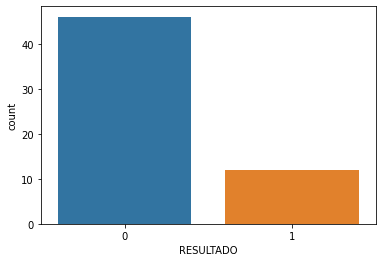

In [7]:
sns.countplot(data_test['RESULTADO']) # só para testar o plotting do grafico


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


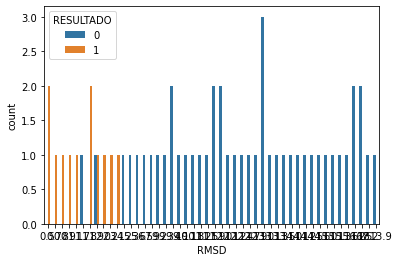

In [8]:
sns.countplot(data_test['RMSD'],hue=data_test['RESULTADO']) # Plotta a relação de duas variaveis


# variable selection

In [9]:
x = (data_test.iloc[:, :3])
y = (data_train['RESULTADO'])

In [ ]:
y #so pra visualizar

# split data into training and test set and criando a arvore

In [11]:
# 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)


In [12]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   


In [13]:
# Decision Tree classifer 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# evaluation

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# plottando a tree

In [15]:
target = list(data_test['RESULTADO'].unique())
feature_names = list(x.columns)

# testing with new data

In [ ]:
CS = input("Entre com o CS: ")
RMSD = input("Entre com o RMSD: ")
ZSCORE = input("Entre com o ZSCORE: ")

resultado = clf.predict([[CS, RMSD, ZSCORE]])

if resultado == 1:
   print("OTIMO")
   
else:
   print("RUIM")

In [19]:
# plotando a tree

In [ ]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)